In [1]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#Load the dataset
car_mpg_dataset = pd.read_csv("A1-car-mpg.txt", header=0, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
car_mpg_dataset.drop(columns=['Car_Model'], inplace=True)
car_mpg_dataset.dropna(inplace=True)
x = car_mpg_dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin']]
y = car_mpg_dataset[["MPG"]]

origin = car_mpg_dataset.pop('Origin')

car_mpg_dataset['USA'] = (origin == 1)*1.0
car_mpg_dataset['Europe'] = (origin == 2)*1.0
car_mpg_dataset['Japan'] = (origin == 3)*1.0

#Scale the data 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
validation_percentage=0.15


Epoch  1 / 100
============= [loss:  0.0414  - mae:  0.1696  - val_loss:  0.0495  - val_mae:   0.195 ]
Epoch  2 / 100
============= [loss:  0.0405  - mae:  0.1666  - val_loss:  0.0487  - val_mae:   0.1918 ]
Epoch  3 / 100
============= [loss:  0.0377  - mae:  0.161  - val_loss:  0.0451  - val_mae:   0.1847 ]
Epoch  4 / 100
============= [loss:  0.03  - mae:  0.1379  - val_loss:  0.0357  - val_mae:   0.1574 ]
Epoch  5 / 100
============= [loss:  0.0158  - mae:  0.0946  - val_loss:  0.0159  - val_mae:   0.0954 ]
Epoch  6 / 100
============= [loss:  0.01  - mae:  0.0742  - val_loss:  0.0083  - val_mae:   0.07 ]
Epoch  7 / 100
============= [loss:  0.0088  - mae:  0.0712  - val_loss:  0.007  - val_mae:   0.0667 ]
Epoch  8 / 100
============= [loss:  0.0118  - mae:  0.0859  - val_loss:  0.0086  - val_mae:   0.0785 ]
Epoch  9 / 100
============= [loss:  0.0077  - mae:  0.0647  - val_loss:  0.0063  - val_mae:   0.0611 ]
Epoch  10 / 100
============= [loss:  0.0077  - mae:  0.0649  - val_loss:

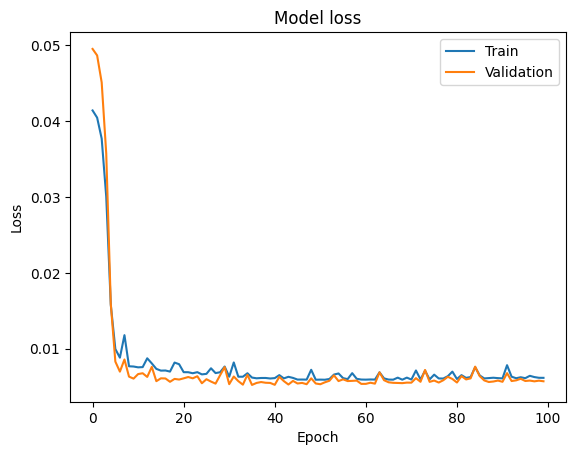

In [13]:
from matplotlib import pyplot as plt
from MyNeuralNetwork import MyNeuralNetwork

#Create the neural network and train
nn = MyNeuralNetwork(layers=[x_scaled.shape[1],9,5,1], nEpochs=100, learning_rate=0.15, momentum=0.50, activation='sigmoid', validation_set=validation_percentage)
nn.fit(x_scaled, y_scaled)

# Optional: Plot the evolution of the training and validation errors  
(loss, val_loss) = nn.loss_epochs()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---Test---
R2 Score:  0.8866413875568738
MSE:  0.004742337538041275
MAE:  0.05431698884161277
---Train---
R2 Score:  0.8516597826613386
MSE:  0.006342255679219285
MAE:  0.057060395345030594

MAPE:  0.14379181198565663


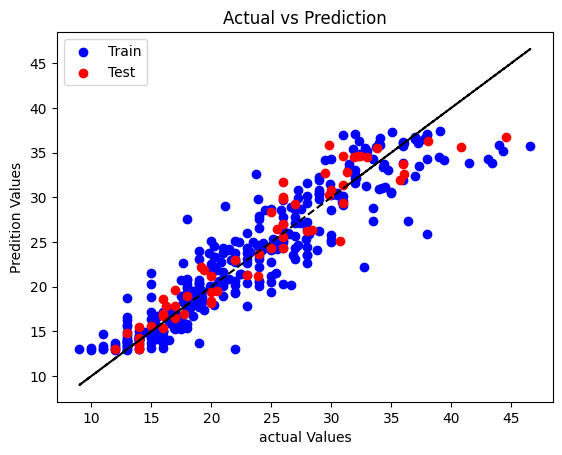

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# Part 3: Obtaining predictions
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=validation_percentage, shuffle=True)
y_pred_test = nn.predict(x_test)
y_pred_train = nn.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", label="Train")
plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()